In [1]:
# import packages

import networkx as nx
import os
import numpy as np
import matplotlib.pyplot as plt

from social_network_analysis_for_startups_workbook import edges

[Link to youtube video of presentation](https://youtu.be/r-VD0P1SWOs)

In [2]:
# check the working directory
os.getcwd()

'/Users/field/Desktop/CUNY/data_620/data_620_assignments'

In [48]:
# import the network data

g = nx.read_gml('lesmis/lesmis.gml')
g = nx.Graph(g)

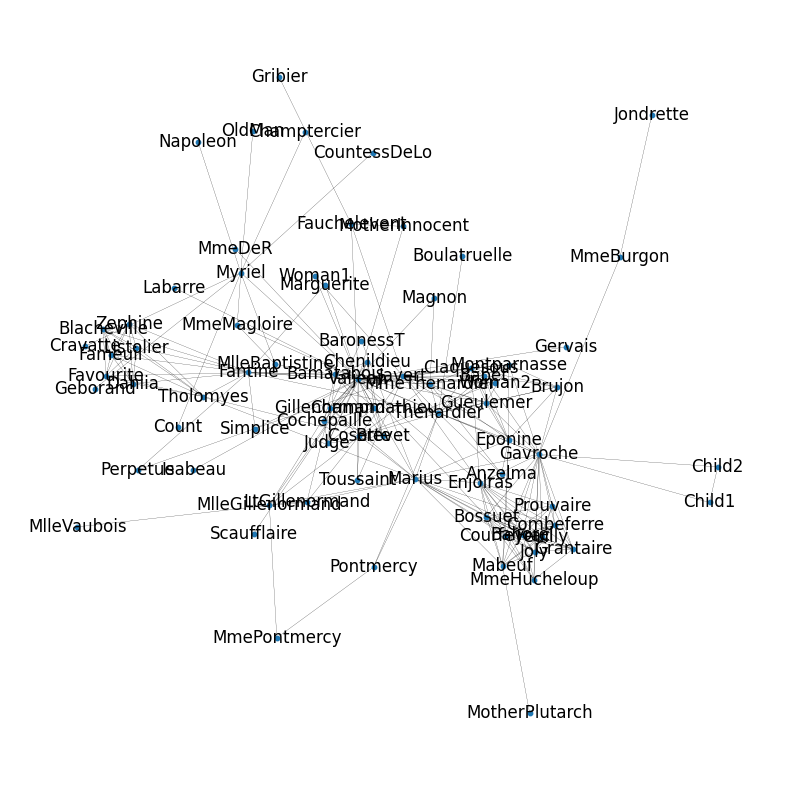

In [49]:
# draw the network

pos = nx.spring_layout(g, iterations = 15, seed = 1234)
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
plot_options = {'node_size': 10, 'with_labels': True, 'width': 0.15}
nx.draw_networkx(g, pos=pos, ax=ax, **plot_options)

In [50]:
# number of nodes
g.number_of_nodes()

77

In [51]:
# number of edges
g.number_of_edges()

254

In [52]:
# average number of degrees
np.mean([d for _, d in g.degree()])

np.float64(6.597402597402597)

In [53]:
# average shortest path length
nx.average_shortest_path_length(g)

2.6411483253588517

In [54]:
# the diameter of the graph

nx.diameter(g)

5

In [55]:
# density: the ratio of actual links to the potential possible links
nx.density(g)

0.08680792891319207

In [57]:
# depth first travel of nodes

def DFS_nodes(graph, node, visited=[]):
    visited.append(node)
    for neighbor in graph[node]:
        if not neighbor in visited:
            DFS_nodes(graph, neighbor, visited)
    return visited

def DFS_edges(graph, node, visited=[], edges=[]):
    visited.append(node)
    for ni in graph[node]:
        if not ni in visited:
            edges.append((node, ni))
            DFS_edges(graph, ni, visited, edges)
    return edges

print(DFS_nodes(g, "Myriel"))
print(DFS_edges(g, "Myriel"))

['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'Valjean', 'Labarre', 'Marguerite', 'Fantine', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Cosette', 'MmeThenardier', 'Thenardier', 'Javert', 'Fauchelevent', 'MotherInnocent', 'Gribier', 'Bamatabois', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Simplice', 'Perpetue', 'Woman1', 'Woman2', 'Gavroche', 'MmeBurgon', 'Jondrette', 'Marius', 'Pontmercy', 'MmePontmercy', 'MlleGillenormand', 'Gillenormand', 'Magnon', 'LtGillenormand', 'BaronessT', 'MlleVaubois', 'Eponine', 'Anzelma', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MmeHucheloup', 'Claquesous', 'Gueulemer', 'Babet', 'Montparnasse', 'Brujon', 'MotherPlutarch', 'Child1', 'Child2', 'Toussaint', 'Boulatruelle', 'MmeDeR', 'Isabeau', 'Gervais', 'Scaufflaire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan']
[('Myriel', 'Napo

In [58]:
# calculate each nodes degree of centrality

d = nx.centrality.degree_centrality(g)

s = []
for k, v in d.items():
    s.append((v,k))

s.sort(reverse=True)

h = []
for k, v in s:
    h.append((v,k))

d = dict(h)
d

{'Valjean': 0.47368421052631576,
 'Gavroche': 0.2894736842105263,
 'Marius': 0.25,
 'Javert': 0.22368421052631576,
 'Thenardier': 0.21052631578947367,
 'Fantine': 0.19736842105263158,
 'Enjolras': 0.19736842105263158,
 'Courfeyrac': 0.17105263157894735,
 'Bossuet': 0.17105263157894735,
 'Joly': 0.15789473684210525,
 'Bahorel': 0.15789473684210525,
 'MmeThenardier': 0.14473684210526316,
 'Mabeuf': 0.14473684210526316,
 'Feuilly': 0.14473684210526316,
 'Eponine': 0.14473684210526316,
 'Cosette': 0.14473684210526316,
 'Combeferre': 0.14473684210526316,
 'Myriel': 0.13157894736842105,
 'Gueulemer': 0.13157894736842105,
 'Grantaire': 0.13157894736842105,
 'Claquesous': 0.13157894736842105,
 'Babet': 0.13157894736842105,
 'Tholomyes': 0.11842105263157894,
 'Prouvaire': 0.11842105263157894,
 'Montparnasse': 0.11842105263157894,
 'Bamatabois': 0.10526315789473684,
 'Zephine': 0.09210526315789473,
 'MmeHucheloup': 0.09210526315789473,
 'MlleGillenormand': 0.09210526315789473,
 'Listolier': 0.09

In [59]:
# write the data to a .gml file

nx.write_gml(g, 'lesmis/lesmis_export.gml')